<a href="https://colab.research.google.com/github/Valdini/McKinsey-Datathon-Submission/blob/master/McKinsey_Datathon_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
'''Documentation at the end'''
'''Part B - Files Import and Data Preparation (Part A is Insights, as documented in separate document)''' 

'''lots of commented input refers to results of executed code or the vehicle_dataset, which I decided to not use at a late stage'''

#File Import from Desktop, based on Pandas, IO, Google.Colab
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()
#vehicle_data = pd.read_csv(io.StringIO(uploaded['vehicles.csv'].decode('utf-8')))
test_data = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))
train_data = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))

Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
test_data = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))
train_data = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#Shuffle Data as a light measure to work with imbalanced classes
from sklearn.utils import shuffle
import numpy as np
train_data = shuffle(train_data)
test_data = shuffle(test_data)
test_data['target'] = np.random.choice(2, (len(test_data)))

In [0]:
'''Part C - Exploratory Data Analysis (EDA)'''


print("Shape of Training Data:", train_data.shape)
print("Shape of Testing Data:", test_data.shape)
#print("Shape of Vehicle Data:", vehicle_data.shape)

'''
Shape of Training Data (136575, 30)
Shape of Testing Data (129950, 29)
Shape of Vehicle Data (451396, 22), several vehicles per accident, thus join with Training Data on "accident_id"

print("train nans:", train_data.isna().sum())
excluded Variables from train_data (more than 50'000 NaNS): junction_control, 2nd_road_class
potentially to be imputed: lsoa_of_accident_location

print("Test nans:", test_data.isna().sum())
excluded Variables from test_data (more than 50'000 NaNS): junction_control, 2nd_road_class
potentially to be imputed: pedestrian_crossing-human_control, pedestrian_crossing-physical_facilities, road_surface_conditions, lsoa_of_accident_location, special_conditions_at_site, carriageway_hazards

print("Vehicle nans:", vehicle_data.isna().sum())
excluded Variables from vehicle_data (more than 50'000 NaNS): Age_of_Driver, Engine_Capacity_(CC), Propulsion_Code, Age_of_Vehicle, Driver_IMD_Decile, Driver_Home_Area_Type, Vehicle_IMD_Decile
potentially to be imputed: Towing_and_Articulation, Vehicle_Manoeuvre, Vehicle_Location-Restricted_Lane, Junction_Location, Skidding_and_Overturning, Hit_Object_in_Carriageway, Vehicle_Leaving_Carriageway, Hit_Object_off_Carriageway, 1st_Point_of_Impact, Was_Vehicle_Left_Hand_Drive?
'''                                      

Shape of Training Data: (136575, 30)
Shape of Testing Data: (129950, 29)


'\nShape of Training Data (136575, 30)\nShape of Testing Data (129950, 29)\nShape of Vehicle Data (451396, 22), several vehicles per accident, thus join with Training Data on "accident_id"\n'

In [0]:
print("Data Types of Training Data:", train_data.dtypes)
#print("Data Types of Vehicle Data:", vehicle_data.dtypes)

'''
All data has type int64, float64 or object
Int64 and float64 can be standardized
Object data needs to be multi-label-encoded or one-hot-encoded (curse of dimensionality if lots of different values per column)
'''

Data Types of Training Data: accident_id                                  int64
location_easting_osgr                      float64
location_northing_osgr                     float64
longitude                                  float64
latitude                                   float64
number_of_vehicles                           int64
number_of_casualties                         int64
date                                        object
time                                        object
1st_road_class                              object
1st_road_number                              int64
road_type                                   object
speed_limit                                float64
junction_detail                             object
junction_control                            object
2nd_road_class                              object
2nd_road_number                            float64
pedestrian_crossing-human_control           object
pedestrian_crossing-physical_facilities     object
li

'\nAll data has type int64, float64 or object\nInt64 and float64 can be standardized\nObject data needs to be multi-label-encoded or one-hot-encoded (curse of dimensionality if lots of different values per column)\n'

In [0]:
#Overview of Columns for Training and Vehicle Data
print("Train_data columns:", train_data.columns)
#print("Vehicle_data columns:", vehicle_data.columns)

Train_data columns: Index(['accident_id', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'number_of_vehicles', 'number_of_casualties',
       'date', 'time', '1st_road_class', '1st_road_number', 'road_type',
       'speed_limit', 'junction_detail', 'junction_control', '2nd_road_class',
       '2nd_road_number', 'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'lsoa_of_accident_location', 'police_force',
       'local_authority_district', 'local_authority_highway', 'target'],
      dtype='object')


In [0]:
#Checking for each dtype=object column whether feature is categorical (finite number of possible values) or text (infinite number of possible values)
print("Checking each column for train and vehicle data: \n", train_data['junction_detail'].value_counts())

'''
train_data:
n = number of categories
road_type = categorical (n=6, one-hot)
date = text (clean by removing year and day)
time = many different values (here makes sense to int() and StandardScale)
1st_road_class = categorical (n=6, one-hot)
junction_detail = categorical (n=9, one-hot)
junction_control = categorical (n=5, one-hot)
2nd_road_class = categorical (n=6, one-hot)
pedestrian_crossing-human_control = categorical (n=3, one-hot)
pedestrian_crossing-physical_facilities = categorical (n=6, one-hot)
light_conditions = categorical (n=5, one-hot)
weather_conditions = categorical (n=9, one-hot)                        
road_surface_conditions = categorical (n=5, one-hot)                     
special_conditions_at_site = categorical (n=7, one-hot)                 
carriageway_hazards = categorical (n=6, one-hot)                       
urban_or_rural_area = categorical (n=2, one-hot)                     
lsoa_of_accident_location =  infinite (consider dropping))                
police_force = around 50 (consider dropping)                           
local_authority_district = infinite (consider dropping)                   
local_authority_highway = infinite (consider dropping) 

vehicle_data:
Vehicle_Type     = 19 (consider dropping or regrouping)                   
Towing_and_Articulation          = categorical (n=6, DROP because almost always no tow)
Vehicle_Manoeuvre                    = categorical (n=18, consider dropping or regrouping)
Vehicle_Location-Restricted_Lane    = categorical (n=10, consider dropping or regrouping)
Junction_Location                   = categorical (n=9, consider dropping or regrouping)
Skidding_and_Overturning             = categorical (n=6, DROP because almost all None)
Hit_Object_in_Carriageway            = categorical (n=10, DROP because almost all None)
Vehicle_Leaving_Carriageway          = categorical (n=9, DROP because almost all None)
Hit_Object_off_Carriageway           = categorical (n=10, DROP because almost all None)
1st_Point_of_Impact = categorical(n=5, one-hot)
Was_Vehicle_Left_Hand_Drive?    = categorical (n=2, DROP because almost all No)
Journey_Purpose_of_Driver      = categorical (n=6, one-hot)
Sex_of_Driver              = categorical (n=2, one-hot, Drop "Not known" (34'130))
Propulsion_Code             = categorical (n=9, one-hot for "Petrol" and "Heavy oil", randomnly assign others)
'''


Checking each column for train and vehicle data: 
 Not at junction or within 20 metres    56372
T or staggered junction                42752
Crossroads                             13192
Roundabout                             11733
Private drive or entrance               4265
Other junction                          3581
Slip road                               1950
Mini-roundabout                         1700
More than 4 arms (not roundabout)        924
Name: junction_detail, dtype: int64


'\ntrain_data:\nn = number of categories\nroad_type = categorical (n=6, one-hot)\ndate = text (clean by removing year and day)\ntime = many different values (here makes sense to int() and StandardScale)\n1st_road_class = categorical (n=6, one-hot)\njunction_detail = categorical (n=9, one-hot)\njunction_control = categorical (n=5, one-hot)\n2nd_road_class = categorical (n=6, one-hot)\npedestrian_crossing-human_control = categorical (n=3, one-hot)\npedestrian_crossing-physical_facilities = categorical (n=6, one-hot)\nlight_conditions = categorical (n=5, one-hot)\nweather_conditions = categorical (n=9, one-hot)                        \nroad_surface_conditions = categorical (n=5, one-hot)                     \nspecial_conditions_at_site = categorical (n=7, one-hot)                 \ncarriageway_hazards = categorical (n=6, one-hot)                       \nurban_or_rural_area = categorical (n=2, one-hot)                     \nlsoa_of_accident_location =  infinite (consider dropping))        

In [0]:
#Is the dependent variable imbalanced?
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplotlib

print("Train_data: \n", train_data['target'].value_counts())

#We do have imbalanced classes!
#put higher emphasis on 1 to avoid model only predicting 0 

Train_data: 
 0    113160
1     23415
Name: target, dtype: int64


"\ncorr_matrix = vehicle_data.corr()\nf, ax = plt.subplots(figsize=(18, 10))\nsns.heatmap(corr_matrix, linewidths=2.0, ax=ax, annot=True)\nax.set_title('Correlation Matrix for Vehicle Data')\n\nWe can see the following redundant variables in Training Data:\n|Correlation Coefficient| > 0.5\n\nDriver_IMD_Decile = Vehicle_IMD_Decile\nDrop Vehicle_IMD_Decile\n"

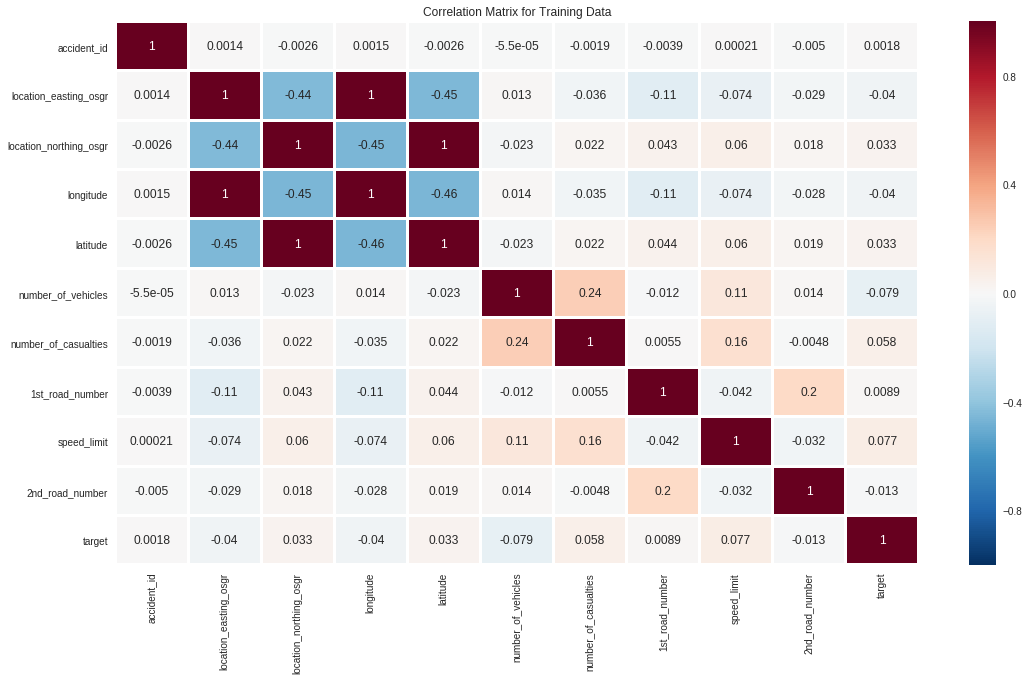

In [0]:
#Check for Redundant Variables in Training Data based on Correlation Matrix
corr_matrix = train_data.corr()
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corr_matrix, linewidths=2.0, ax=ax, annot=True)
ax.set_title('Correlation Matrix for Training Data')

'''
We can see the following redundant variables in Training Data:
|Correlation Coefficient| > 0.5

location_easting_osgr = longitude
location_northing_osgr = latitude
Drop location_easting_osgr, location_northing_osgr
'''

#Check for Redundant Variables in Vehicle Data based on Correlation Matrix
'''
corr_matrix = vehicle_data.corr()
f, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(corr_matrix, linewidths=2.0, ax=ax, annot=True)
ax.set_title('Correlation Matrix for Vehicle Data')

We can see the following redundant variables in Training Data:
|Correlation Coefficient| > 0.5

Driver_IMD_Decile = Vehicle_IMD_Decile
Drop Vehicle_IMD_Decile
'''

In [0]:
'''
Summary of Exploratory Data Analysis (EDA) as a To-do List for Data Cleaning & Preprocessing

- Columns to be dropped (because of NaNs, curse of dimensionality etc.):
  Train_data: weather_conditions, time, date, location_easting_osgr, location_northing_osgr, lsoa_of_accident_location, police_force, local_authority_district, local_authority_highway, junction_control, 2nd_road_class
  Vehicle_data: Vehicle_IMD_Decile, Engine_Capacity_(CC), Age_of_Vehicle, Driver_Home_Area_Type, 
    potentially to be dropped if not performing well: Towing_and_Articulation, Vehicle_Manoeuvre, Vehicle_Location-Restricted_Lane, Junction_Location, Skidding_and_Overturning, Hit_Object_in_Carriageway            
                                                      Vehicle_Leaving_Carriageway, Hit_Object_off_Carriageway, Was_Vehicle_Left_Hand_Drive?, Propulsion_Code, Age_of_Driver

- Columns that need missing value imputation (choosing the mode as imputation strategy):
  Train_data: lsoa_of_accident_location
  Vehicle_data: Towing_and_Articulation, Vehicle_Manoeuvre, Vehicle_Location-Restricted_Lane, Junction_Location, Skidding_and_Overturning, Hit_Object_in_Carriageway, Vehicle_Leaving_Carriageway, Hit_Object_off_Carriageway, 1st_Point_of_Impact, Was_Vehicle_Left_Hand_Drive?

- Type 'Object' columns with label and one-hot encoding:
  Train_data: road_type, junction_detail, 1st_road_class, pedestrian_crossing-human_control, pedestrian_crossing-physical_facilities, light_conditions,
              road_surface_conditions, special_conditions_at_site, carriageway_hazards
  Vehicle_data: 1st_Point_of_Impact, Sex_of_Driver (Drop 'Not known'), Journey_Purpose_of_Driver

- Some object columns are worth more advanced preprocessing
  Train_data: date (clean by removing year and day), time (here makes sense to int() and StandardScale), 
  Vehicle_data: Vehicle_Type(19, regrouping), 

- All int64 and float64 columns to be standardized/StandardScaled

- Handle imbalanced dependent variable/target: put higher emphasis on 1's than on O's

- Check for PCA (Principal Component Analysis), to determine which features cause the most variance in regards to the dependent variable

- Join Training Data with Vehicle Data on accident_id (several vehicles per accident)

- Train_test_split

- Apply Models

'''

'''END OF Part C - EXPLORATORY DATA ANALYSIS (EDA)'''

'END OF Part C - EXPLORATORY DATA ANALYSIS (EDA)'

In [0]:
'''Part D - Data Cleaning & Preprocessing'''

#Drops
train_data = train_data.drop(['junction_detail','number_of_casualties', 'local_authority_district', 'number_of_vehicles', 'urban_or_rural_area', 'weather_conditions', 'date', 'time', 'junction_control', '2nd_road_class', 'location_easting_osgr', 'location_northing_osgr', 'lsoa_of_accident_location', 'police_force', 'local_authority_district', 'local_authority_highway'], axis=1)
test_data = test_data.drop(['junction_detail','number_of_casualties', 'local_authority_district', 'number_of_vehicles', 'urban_or_rural_area', 'weather_conditions', 'date', 'time', 'junction_control', '2nd_road_class', 'location_easting_osgr', 'location_northing_osgr', 'lsoa_of_accident_location', 'police_force', 'local_authority_district', 'local_authority_highway'], axis=1)
#vehicle_data.drop(['Sex_of_Driver','Propulsion_Code', 'Age_of_Driver', 'Engine_Capacity_(CC)', 'Age_of_Vehicle', 'Driver_Home_Area_Type', 'Vehicle_IMD_Decile'], axis=1)
#'Towing_and_Articulation', 'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane', 'Junction_Location', 'Skidding_and_Overturning', 'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway', 'Was_Vehicle_Left_Hand_Drive?'

In [0]:
print(train_data.columns)

Index(['accident_id', 'longitude', 'latitude', '1st_road_class',
       '1st_road_number', 'road_type', 'speed_limit', '2nd_road_number',
       'pedestrian_crossing-human_control',
       'pedestrian_crossing-physical_facilities', 'light_conditions',
       'road_surface_conditions', 'special_conditions_at_site',
       'carriageway_hazards', 'target'],
      dtype='object')


In [0]:
#Missing Value Imputation with Mode for columns defined above
#train_data.lsoa_of_accident_location.fillna(train_data.lsoa_of_accident_location.mode()[0], inplace=True)

'''
vehicle_data.Towing_and_Articulation.fillna(vehicle_data.Towing_and_Articulation.mode()[0], inplace=True)
vehicle_data.Vehicle_Manoeuvre.fillna(vehicle_data.Vehicle_Manoeuvre.mode()[0], inplace=True)
vehicle_data['Vehicle_Location-Restricted_Lane'].fillna(vehicle_data['Vehicle_Location-Restricted_Lane'].mode()[0], inplace=True)
vehicle_data.Junction_Location.fillna(vehicle_data.Junction_Location.mode()[0], inplace=True)
vehicle_data.Skidding_and_Overturning.fillna(vehicle_data.Skidding_and_Overturning.mode()[0], inplace=True)
vehicle_data.Hit_Object_in_Carriageway.fillna(vehicle_data.Hit_Object_in_Carriageway.mode()[0], inplace=True)
vehicle_data.Vehicle_Leaving_Carriageway.fillna(vehicle_data.Vehicle_Leaving_Carriageway.mode()[0], inplace=True)
vehicle_data.Hit_Object_off_Carriageway.fillna(vehicle_data.Hit_Object_off_Carriageway.mode()[0], inplace=True)
vehicle_data['1st_Point_of_Impact'].fillna(vehicle_data['1st_Point_of_Impact'].mode()[0], inplace=True)
vehicle_data['Was_Vehicle_Left_Hand_Drive?'].fillna(vehicle_data['Was_Vehicle_Left_Hand_Drive?'].mode()[0], inplace=True)
'''


"\nvehicle_data.Towing_and_Articulation.fillna(vehicle_data.Towing_and_Articulation.mode()[0], inplace=True)\nvehicle_data.Vehicle_Manoeuvre.fillna(vehicle_data.Vehicle_Manoeuvre.mode()[0], inplace=True)\nvehicle_data['Vehicle_Location-Restricted_Lane'].fillna(vehicle_data['Vehicle_Location-Restricted_Lane'].mode()[0], inplace=True)\nvehicle_data.Junction_Location.fillna(vehicle_data.Junction_Location.mode()[0], inplace=True)\nvehicle_data.Skidding_and_Overturning.fillna(vehicle_data.Skidding_and_Overturning.mode()[0], inplace=True)\nvehicle_data.Hit_Object_in_Carriageway.fillna(vehicle_data.Hit_Object_in_Carriageway.mode()[0], inplace=True)\nvehicle_data.Vehicle_Leaving_Carriageway.fillna(vehicle_data.Vehicle_Leaving_Carriageway.mode()[0], inplace=True)\nvehicle_data.Hit_Object_off_Carriageway.fillna(vehicle_data.Hit_Object_off_Carriageway.mode()[0], inplace=True)\nvehicle_data['1st_Point_of_Impact'].fillna(vehicle_data['1st_Point_of_Impact'].mode()[0], inplace=True)\nvehicle_data['Wa

In [0]:
#label and one-hot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

'''train_data.apply(LabelEncoder().fit_transform)'''


'''
le.fit_transform(train_data['longitude', 'latitude',  'number_of_vehicles', 'number_of_casualties', '1st_road_number', 'speed_limit', '2nd_road_number', 'road_type', 'junction_detail', '1st_road_class',
                 'pedestrian_crossing-human_control', 'pedestrian_crossing-physical_facilities', 'light_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards'])
                 
'''


test_data['longitude'] = le.fit_transform(test_data['longitude'].astype(str))
test_data['latitude'] = le.fit_transform(test_data['latitude'].astype(str))
#train_data['number_of_vehicles'] = le.fit_transform(train_data['number_of_vehicles'].astype(str))
#train_data['number_of_casualties'] = le.fit_transform(train_data['number_of_casualties'].astype(str))
test_data['1st_road_number'] = le.fit_transform(test_data['1st_road_number'].astype(str))
test_data['speed_limit'] = le.fit_transform(test_data['speed_limit'].astype(str))
test_data['2nd_road_number'] = le.fit_transform(test_data['2nd_road_number'].astype(str))

test_data['road_type'] = le.fit_transform(test_data['road_type'].astype(str))
#train_data['road_type'] = enc.fit_transform(train_data['road_type'].reshape(-1,1)).toarray()

#train_data['junction_detail'] = le.fit_transform(train_data['junction_detail'].astype(str))
#train_data['junction_detail'] = enc.fit_transform(train_data['junction_detail'].reshape(-1,1))

test_data['1st_road_class'] = le.fit_transform(test_data['1st_road_class'].astype(str))
#train_data['1st_road_class'] = enc.fit_transform(train_data['1st_road_class'].reshape(-1,1))

test_data['pedestrian_crossing-human_control'] = le.fit_transform(test_data['pedestrian_crossing-human_control'].astype(str))
#train_data['pedestrian_crossing-human_control'] = enc.fit_transform(train_data['pedestrian_crossing-human_control'].reshape(-1,1))

test_data['pedestrian_crossing-physical_facilities'] = le.fit_transform(test_data['pedestrian_crossing-physical_facilities'].astype(str))
#train_data['pedestrian_crossing-physical_facilities'] = enc.fit_transform(train_data['pedestrian_crossing-physical_facilities'].reshape(-1,1))

test_data['light_conditions'] = le.fit_transform(test_data['light_conditions'].astype(str))
#train_data['light_conditions'] = enc.fit_transform(train_data['light_conditions'].reshape(-1,1))

test_data['road_surface_conditions'] = le.fit_transform(test_data['road_surface_conditions'].astype(str))
#train_data['road_surface_conditions'] = enc.fit_transform(train_data['road_surface_conditions'].reshape(-1,1))

test_data['special_conditions_at_site'] = le.fit_transform(test_data['special_conditions_at_site'].astype(str))
#train_data['special_conditions_at_site'] = enc.fit_transform(train_data['special_conditions_at_site'].reshape(-1,1))

test_data['carriageway_hazards'] = le.fit_transform(test_data['carriageway_hazards'].astype(str))
#train_data['carriageway_hazards'] = enc.fit_transform(train_data['carriageway_hazards'].reshape(-1,1))

train_data['longitude'] = le.fit_transform(train_data['longitude'].astype(str))
train_data['latitude'] = le.fit_transform(train_data['latitude'].astype(str))
#train_data['number_of_vehicles'] = le.fit_transform(train_data['number_of_vehicles'].astype(str))
#train_data['number_of_casualties'] = le.fit_transform(train_data['number_of_casualties'].astype(str))
train_data['1st_road_number'] = le.fit_transform(train_data['1st_road_number'].astype(str))
train_data['speed_limit'] = le.fit_transform(train_data['speed_limit'].astype(str))
train_data['2nd_road_number'] = le.fit_transform(train_data['2nd_road_number'].astype(str))

train_data['road_type'] = le.fit_transform(train_data['road_type'].astype(str))
#train_data['road_type'] = enc.fit_transform(train_data['road_type'].reshape(-1,1)).toarray()

#train_data['junction_detail'] = le.fit_transform(train_data['junction_detail'].astype(str))
#train_data['junction_detail'] = enc.fit_transform(train_data['junction_detail'].reshape(-1,1))

train_data['1st_road_class'] = le.fit_transform(train_data['1st_road_class'].astype(str))
#train_data['1st_road_class'] = enc.fit_transform(train_data['1st_road_class'].reshape(-1,1))

train_data['pedestrian_crossing-human_control'] = le.fit_transform(train_data['pedestrian_crossing-human_control'].astype(str))
#train_data['pedestrian_crossing-human_control'] = enc.fit_transform(train_data['pedestrian_crossing-human_control'].reshape(-1,1))

train_data['pedestrian_crossing-physical_facilities'] = le.fit_transform(train_data['pedestrian_crossing-physical_facilities'].astype(str))
#train_data['pedestrian_crossing-physical_facilities'] = enc.fit_transform(train_data['pedestrian_crossing-physical_facilities'].reshape(-1,1))

train_data['light_conditions'] = le.fit_transform(train_data['light_conditions'].astype(str))
#train_data['light_conditions'] = enc.fit_transform(train_data['light_conditions'].reshape(-1,1))

train_data['road_surface_conditions'] = le.fit_transform(train_data['road_surface_conditions'].astype(str))
#train_data['road_surface_conditions'] = enc.fit_transform(train_data['road_surface_conditions'].reshape(-1,1))

train_data['special_conditions_at_site'] = le.fit_transform(train_data['special_conditions_at_site'].astype(str))
#train_data['special_conditions_at_site'] = enc.fit_transform(train_data['special_conditions_at_site'].reshape(-1,1))

train_data['carriageway_hazards'] = le.fit_transform(train_data['carriageway_hazards'].astype(str))
#train_data['carriageway_hazards'] = enc.fit_transform(train_data['carriageway_hazards'].reshape(-1,1))


'''
vehicle_data['1st_Point_of_Impact'] = le.fit_transform(vehicle_data['1st_Point_of_Impact'].astype(str))
vehicle_data['1st_Point_of_Impact'] = enc.fit_transform(vehicle_data['1st_Point_of_Impact'].reshape(-1,1))

vehicle_data['Journey_Purpose_of_Driver'] = le.fit_transform(vehicle_data['Journey_Purpose_of_Driver'].astype(str))
vehicle_data['Journey_Purpose_of_Driver'] = enc.fit_transform(vehicle_data['Journey_Purpose_of_Driver'].reshape(-1,1))
'''

"\nvehicle_data['1st_Point_of_Impact'] = le.fit_transform(vehicle_data['1st_Point_of_Impact'].astype(str))\nvehicle_data['1st_Point_of_Impact'] = enc.fit_transform(vehicle_data['1st_Point_of_Impact'].reshape(-1,1))\n\nvehicle_data['Journey_Purpose_of_Driver'] = le.fit_transform(vehicle_data['Journey_Purpose_of_Driver'].astype(str))\nvehicle_data['Journey_Purpose_of_Driver'] = enc.fit_transform(vehicle_data['Journey_Purpose_of_Driver'].reshape(-1,1))\n"

In [0]:
#Advanced Cleaning as summarised above, but no time
#print(train_data['date'].head)
#print(train_data.time.astype(int))

In [0]:
'''Part E - Training and Evaluation with XGB, SGD, Logistic'''
import numpy as np
from sklearn import cross_validation
from sklearn.model_selection import train_test_split
x_train = train_data.drop(['target'], axis=1)
y_train = train_data.target
x_test = test_data.drop(['target'], axis=1)
y_test = test_data.target
#x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size = 0.25)
#print(len(x_train))

In [0]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

136575
136575
129950
129950


In [0]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)

#train_data = train_data.astype(str)
#train_data = scaler.fit_transform(train_data)

In [0]:
#1st Model - Popular XGBClassifier
import xgboost as xgb
from xgboost import XGBClassifier
xgb_model = XGBClassifier(booster='gbtree', n_estimators = 1000, learning_rate = 0.05, reg_alpha=0, scale_pos_weight=1.2, subsample=1, max_depth=15, gamma=0)
xgb_model.fit(x_train, y_train, early_stopping_rounds = 10, eval_set = [(x_test, y_test)], verbose = False)
#print(xgb_model) to see parameters
#reg_lambda=100
xgb_predictions = xgb_model.predict(x_test, ntree_limit=xgb_model.best_ntree_limit)
xgb_predictions = xgb_predictions.round()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
#Evaluation of XGBClassifier as F1-Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, xgb_predictions, average='weighted')
print('f1 Score of XGBClassifier is:', f1)

f1 Score of XGBClassifier is: 0.3491071496182984


In [0]:
'''
#Further Models, no time - SGDClassifier (proposed by Scikit-Learn), Logistic Regression
from sklearn import linear_model
clf = linear_model.SGDClassifier(max_iter=1000)
clf.fit(x, y)
clf_pred = clf.predict(x_test)

#Evaluation of SGDClassifier as F1-Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, clf_pred, average='weighted')
print('f1 Score of SGDClassifier is:', f1)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf4 = LogisticRegression()
clf4.fit(x_train, y_train)
y_pred = clf4.predict(x_test)

#Evaluation of Logistic Regression as F1-Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, clf4, average='weighted')
print('f1 Score of Logistic Regression is:', f1)
'''

"\n#Further Models, no time - SGDClassifier (proposed by Scikit-Learn), Logistic Regression\nfrom sklearn import linear_model\nclf = linear_model.SGDClassifier(max_iter=1000)\nclf.fit(x, y)\nclf_pred = clf.predict(x_test)\n\n#Evaluation of SGDClassifier as F1-Score\nfrom sklearn.metrics import f1_score\nf1 = f1_score(y_test, clf_pred, average='weighted')\nprint('f1 Score of SGDClassifier is:', f1)\n\n#Logistic Regression\nfrom sklearn.linear_model import LogisticRegression\nclf4 = LogisticRegression()\nclf4.fit(x_train, y_train)\ny_pred = clf4.predict(x_test)\n\n#Evaluation of Logistic Regression as F1-Score\nfrom sklearn.metrics import f1_score\nf1 = f1_score(y_test, clf4, average='weighted')\nprint('f1 Score of Logistic Regression is:', f1)\n"

In [0]:
'''
Part F - Hyperparameter Optimization with GridSearchCV (no time left)


from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [1000,3000,5000]}] 
grid_search = GridSearchCV(estimator = xgb_model, param_grid = parameters, scoring = 'f1_weighted', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
print("Best Grid CV Score:", grid_search.best_score_)
print("Best Grid CV Params:", grid_search.best_params_)
'''

In [0]:
'''Part G - Write Prediction to CSV'''

'''
import csv
with open('valentinkahn.csv', 'w') as file:
  writer = csv.writer(file)
'''

!pip install -U -q PyDrive
import scipy.sparse as sparse
import pydrive
from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
predi = pd.DataFrame(xgb_predictions, x_test['accident_id'], columns=['target']).to_csv('valentinkahn.csv')
uploaded = drive.CreateFile({'title': 'valentinkahn.csv'})
uploaded.SetContentFile('valentinkahn.csv')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1HAOdnFBW21O_arasPGNK57NV8g7z3aRi


In [0]:
#Rank variables for their causation of variance regarding the dependent variable/target
from sklearn.decomposition import PCA
pca = PCA()
x_train = x_train.drop(['accident_id'], axis=1)
featurenames = list(x_train.columns)
x_train = pca.fit_transform(x_train)

explained_variance = pca.explained_variance_ratio_
indices = np.argsort(explained_variance)[::-1]
print("Variance Causation Ranking:")
for f in range(train_data.shape[1]):
    print("%d. %s (%f)" % (f + 1, featurenames[f], explained_variance[indices[f]]))

Variance Causation Ranking:
1. longitude (0.576549)
2. latitude (0.422777)
3. 1st_road_class (0.000492)
4. 1st_road_number (0.000182)
5. road_type (0.000000)
6. speed_limit (0.000000)
7. 2nd_road_number (0.000000)
8. pedestrian_crossing-human_control (0.000000)
9. pedestrian_crossing-physical_facilities (0.000000)
10. light_conditions (0.000000)
11. road_surface_conditions (0.000000)
12. special_conditions_at_site (0.000000)
13. carriageway_hazards (0.000000)


IndexError: ignored

In [0]:
Name: Valentin Kahn
City, Date: Zürich, November 17, 2018

Link to this code as a Google Colab Jupyter Notebook: https://colab.research.google.com/drive/1XuBeNwJUwrZJHNTRnYncUOnmgCLBEHBe

Structure/Outline as follows:
- Part A - Insights
- Part B - Files Import and Data Preparation
- Part C - Exploratory Data Analysis (EDA)
- Part D - Data Cleaning & Preprocessing
- Part E - Training and Evaluation with XGB, SGD, Logistic Regression
- Part F - Hyperparameter Optimization with GridSearchCV (no time left)
- Part G - Write Prediction to CSV


Part A - Insights 

Brief approach: I started with an initial hypothesis on which features might help the UK government understand which actions to take in order to mitigate road accidents. After I imported the CSV files to Google Colab and shuffled the datasets, I performed Exploratory Data Analysis (EDA), including shapes and data types, check for imbalanced classes, correlation matrix to check 
for redundant features and scanning for missing values. I then cleaned and preprocessed the data by removing redundant values, dropping columns, imputing missing values based on their mode i.a. I encoded and scaled the features, divided into training and testing set and used the popular
XGBClassifier as classification algorithm for the binary road accident fatality classification problem.

I applied above feature engineering and data preprocessing ideas based on previous experience and observations made in the dataset (for instance: "How many dimensions has feature X?", "How do features Y and Z correlate?" etc.).

I chose my final model (the XGBClassifier) based on previous experience and advise from multiple experts and experience data scientists. I wanted to perform hyperparameter optimization based on GridSearchCV on the XGBClassifier, but lacked time to complete this final step.
Optimizing hyperparameters based on GridSearchCV thus would be my top approach that I would try to improve my score.

Takeaways: I should have initially spent more time on intuition (for instance: "Which variables are even under control of the UK government?") and less on data exploration. Good intuition vastly decreases the time needed to perform exploration and subsequently preprocessing.

Part B - Files Import and Data Preparation

Google Colab was used as a private, cloud-based, open-source solution that handles all dependencies and simplifies the process
NOTE: CODE IS OPTIMIZED FOR SIMPLE USE ON GOOGLE COLAB. SO PLEASE RUN THE CODE IN YOUR BROWSER (NO DEPENDENCIES NEEDED, JUST LOGIN WITH GOOGLE ACCOUNT): LINK: https://colab.research.google.com/drive/1XuBeNwJUwrZJHNTRnYncUOnmgCLBEHBe
In top bar of Google Colab, select "Runtime" > "Change runtime type" > GPU to run much faster (especially important for one-hot encoding which takes long due to high dimensions for some features)

Part C - Exploratory Data Analysis (EDA)

About Data
- Size Vehicles: 451'397 (so more cars than accidents, makes sense), Test: 130k, Train: 136k (about the same)
- Key Question for Feature Selection: WHICH VARIABLES CAN UK GOVT EVEN INFLUENCE?
- Groups of Variables
  Accident: ID, Vehicles, Casualties, 
  Location-specific (UK govt influencable): Police Force, Longitude, Latitude, Local Authority District, Local Authority ONS, Urban or Rural Area, Speed Limit
  Permanent Road Conditions (UK govt influencable): Junction Control, Junction Category Road #1, Junction Category Road #2, # for 1st Road, # for 2nd Road, Pedestrian Control, Pedestrian Facilities
  Accident-specific: Police Officer Attendance (UK), Date, Time, Weather Conditions, Lightning (UK), Type of Road (UK)
  Vehicles - Accident: Manoeuvre, Skidding, Object in Carriage, Object of Carriage, Vehicle Location, Junction Location, Vehicle Leaving Carriageway, 1st Point of Impact
  Vehicles - Personal: ID, Journey Purpose, Sex, Age, Age Group, IMD Index (?), Driver Area, Type of Vehicle, Articulation, Left Hand  Drive, Engine Capacity, Vehicle Fuel Type, Age of Vehicle, Vehicle Reference
  Temporary Road Conditions: Surface, Special Conditions, Carriageway Hazards
  Target: Severity of accident

Potential Selection of Algorithms to be tested
- Linear Regression, Logistic Regression (seems to perform well on these tasks)
- Decision Tree
- SVM (SVC, allows for special handling of imbalanced classes)
- Naive Bayes
- KNN
- KMC
- Random Forest
- Gradient Boosting
- XGBoost Classifier (very popular, performs well, Scikit-Learn, p.33)
- SGD Classifier (recommended by Scikit-Learn)


Part C & D - Summary of Exploratory Data Analysis (EDA, Part C) as a To-do List for Data Cleaning & Preprocessing (Part D)

- Columns to be dropped (because of NaNs, curse of dimensionality etc.):
  Train_data: weather_conditions, time, date, location_easting_osgr, location_northing_osgr, lsoa_of_accident_location, police_force, local_authority_district, local_authority_highway, junction_control, 2nd_road_class
  Vehicle_data: Vehicle_IMD_Decile, Engine_Capacity_(CC), Age_of_Vehicle, Driver_Home_Area_Type, 
    potentially to be dropped if not performing well: Towing_and_Articulation, Vehicle_Manoeuvre, Vehicle_Location-Restricted_Lane, Junction_Location, Skidding_and_Overturning, Hit_Object_in_Carriageway, Vehicle_Leaving_Carriageway, Hit_Object_off_Carriageway, Was_Vehicle_Left_Hand_Drive?, Propulsion_Code, Age_of_Driver

- Columns that need missing value imputation (choosing the mode as imputation strategy):
  Train_data: lsoa_of_accident_location
  Vehicle_data: Towing_and_Articulation, Vehicle_Manoeuvre, Vehicle_Location-Restricted_Lane, Junction_Location, Skidding_and_Overturning, Hit_Object_in_Carriageway, Vehicle_Leaving_Carriageway, Hit_Object_off_Carriageway, 1st_Point_of_Impact, Was_Vehicle_Left_Hand_Drive?

- Type 'Object' columns with label and one-hot encoding:
  Train_data: road_type, junction_detail, 1st_road_class, pedestrian_crossing-human_control, pedestrian_crossing-physical_facilities, light_conditions, road_surface_conditions, special_conditions_at_site, carriageway_hazards
  Vehicle_data: 1st_Point_of_Impact, Sex_of_Driver (Drop 'Not known'), Journey_Purpose_of_Driver

- Some object columns are worth more advanced preprocessing
  Train_data: date (clean by removing year and day), time (here makes sense to int() and StandardScale), 
  Vehicle_data: Vehicle_Type(19, regrouping), 

- All int64 and float64 columns to be standardized/StandardScaled

- Handle imbalanced dependent variable/target: put higher emphasis on 1's than on O's

- Check for PCA (Principal Component Analysis), to determine which features cause the most variance in regards to the dependent variable

- Join Training Data with Vehicle Data on accident_id (several vehicles per accident), was no time left

- Train_test_split

- Apply Models


